In [232]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.patches import Ellipse
#from sklearn.mixture import GMM
import sklearn.mixture as sm
figure_path = "/Users/conorosully/Google Drive/Trinity/S2/Applied Statistical Modelling/A2/doc/Sections/Figures/{}"

import folium

In [141]:
question3 = pd.read_csv("data/question2_1.csv")
question3.head()

,business_id,name,latitude,longitude,review_count,stars,is_open,Italian,Japanese,Pizza,Coffee & Tea,stars_1,stars_2,stars_3,stars_4,stars_5,length,last_year,last_date
0,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,43.71140,-79.39934,12,3.0,0,1,0,0,0,2,2,4,3,1,1475.750000,2012,1334444400
1,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,43.66926,-79.33590,39,3.5,1,0,0,0,0,0,4,11,20,4,643.153846,2017,1511827200
2,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,43.78182,-79.49043,3,5.0,1,0,0,0,0,0,0,0,0,3,218.333333,2017,1512777600
3,FXHfcFVEfI1vVngW2gVOpw,Bampot House of Tea & Board Games,43.66158,-79.40888,55,4.0,1,0,0,0,1,4,3,4,14,30,838.800000,2017,1510099200
4,VXH7zXcZzXlmAVN8GSjGRQ,Thai Express,43.77488,-79.49462,5,3.0,1,0,0,0,0,1,0,2,1,1,341.400000,2017,1512172800


In [250]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    
    ax.add_patch(Ellipse(position, 2 * width, 2 * height,
                             angle,edgecolor=(0, 0, 0,0.5),fill=False))
        
def plot_gmm(gmm, X,x,y,filename, label=True, ax=None):
    fig = plt.figure(figsize=(12,8))
    ax = ax or plt.gca()
    
    
    labels = gmm.fit(X).predict(X)
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    
    if label:
        ax.scatter(x=X[:, 0], y=X[:, 1], c=labels, s=40, cmap='Set1', zorder=1)
    else:
        ax.scatter(x=X[:, 0], y=X[:, 1], s=40, zorder=1)
    
    plt.ylabel(y,size=18)
    plt.xlabel(x,size=18)
    
    plt.savefig(figure_path.format(filename),format='eps',dpi=1000)
    

In [193]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

def BIC(X,filename):
    n_clusters=np.arange(2, 21)
    bics=[]
    bics_err=[]
    iterations=20
    for n in n_clusters:
        tmp_bic=[]
        for _ in range(iterations):
            gmm=sm.GaussianMixture(n, n_init=2).fit(X) 
            tmp_bic.append(gmm.bic(X))
        val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
        err=np.std(tmp_bic)
        bics.append(val)
        bics_err.append(err)
    
    fig = plt.figure(figsize=(16,8))
    plt.plot(n_clusters, np.gradient(bics), label='BIC Gradient')
    #plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
    plt.title("Gradient of BIC Scores", fontsize=20)
    plt.xticks(n_clusters)
    plt.xlabel("No. of clusters")
    plt.ylabel("Gradeint of BIC")
    plt.legend()
    
    plt.savefig(figure_path.format(filename),format='eps',dpi=1000)
    
    
    

In [76]:
n_clusters=np.arange(2, 4)
n_clusters

array([2, 3])

In [247]:
X = question3[['longitude','latitude']].values

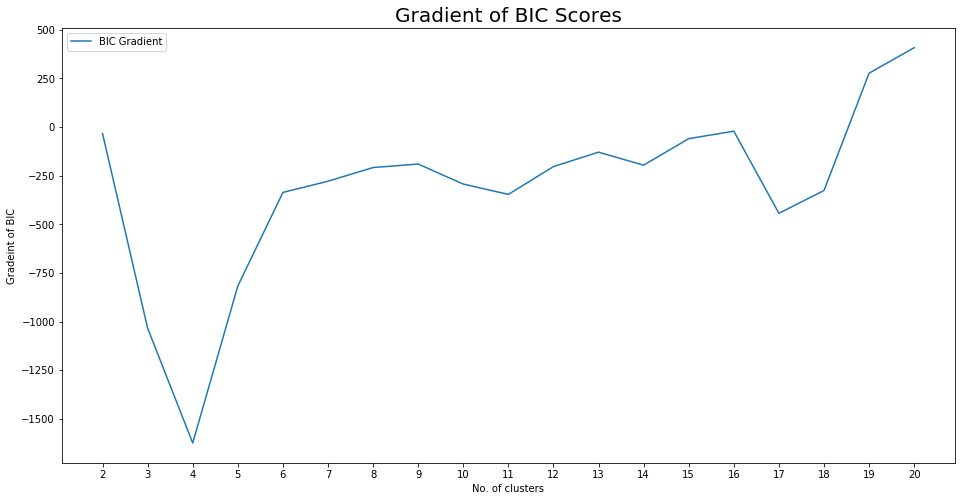

In [197]:
BIC(X,'latlon_gradient.eps')

Select Points 6, at point 7 the gradient evens off. There is not much gain to adding more clusters. We want to avoid over fitting. 

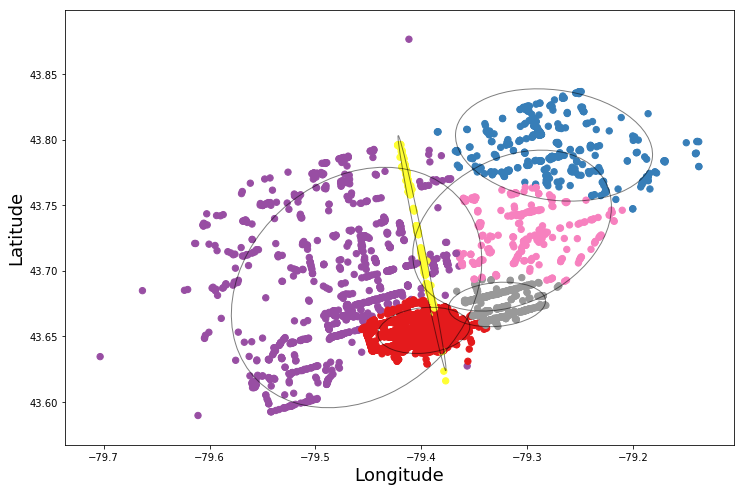

In [251]:
gmm = sm.GaussianMixture(n_components=6, random_state=11,n_init=5)
plot_gmm(gmm, X, "Longitude","Latitude",filename = "latlong_clusters.eps")


In [215]:
X

array([[ 43.7114 , -79.39934],
       [ 43.66926, -79.3359 ],
       [ 43.78182, -79.49043],
       ...,
       [ 43.59686, -79.52331],
       [ 43.64871, -79.37088],
       [ 43.66603, -79.38434]])

{0, 1, 2, 3, 4, 5}


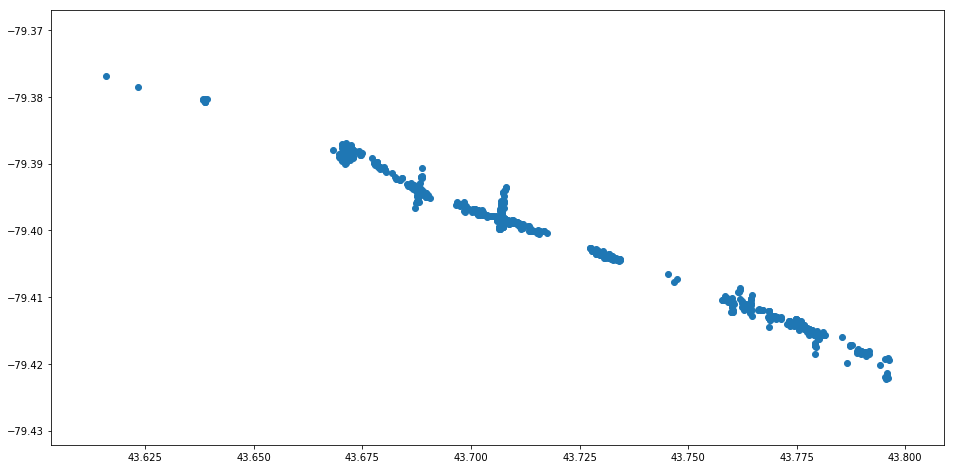

In [227]:
prediction = gmm.fit(X).predict(X)
print(set(prediction))

lat = []
lon = []
for i in range(len(X)):
    if prediction[i] == 3:
        lat.append(X[i][0])
        lon.append(X[i][1])
fig = plt.figure(figsize=(16,8))
plt.scatter(lat, lon)

In [243]:
m = folium.Map(
    location=[43.77923, -79.41731999999998],
    zoom_start=12,
    tiles='Stamen Terrain'
)

for i in range(len(lat)):
    folium.CircleMarker(location=[ lat[i],lon[i] ],radius=2).add_to(m)

filename = "clustermap.html"
m.save(figure_path.format(filename))
m

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb
https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

Not necessarily good to clasify resturants by heighbourhood. Some neighbourhoods may have no resturants/ few resturants. Some important clusters of resturants my overlap diffenrt neighbourhoods

We can identify these important clusters of resturant with mixture gausian model. These can be considered hotspots. Yellow seems to be an imporant road. prehaps this is torontos main road. The pink cluster seems to be dense . Pink and red appear to be hot spots. BLue grey and purple ar emore spread out. 

In [252]:
x = 'length'
y = 'review_count'
X = question3[[x,y]].values

In [ ]:
BIC(X,'info_gradient.eps')

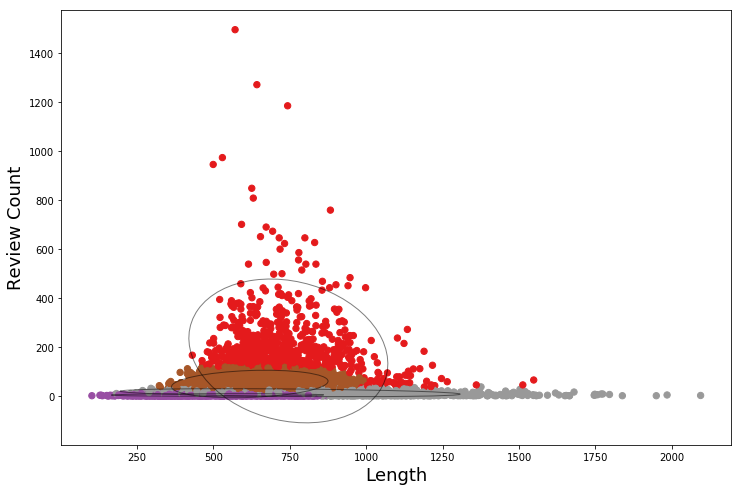

In [254]:
gmm = sm.GaussianMixture(n_components=4, random_state=12)
plot_gmm(gmm, X,"Length","Review Count",filename = 'info_clusters.eps')




Purple = low information
red = high infmation
brown = moderate information
Grey = perplexing 


In [137]:
question3['total'] = question3['length']*question3['review_count']
question3.head()

,business_id,name,latitude,longitude,review_count,stars,is_open,Italian,Japanese,Pizza,Coffee & Tea,stars_1,stars_2,stars_3,stars_4,stars_5,length,last_year,last_date,total
0,l09JfMeQ6ynYs5MCJtrcmQ,Alize Catering,43.71140,-79.39934,12,3.0,0,1,0,0,0,2,2,4,3,1,1475.750000,2012,1334444400,17709.0
1,1K4qrnfyzKzGgJPBEcJaNQ,Chula Taberna Mexicana,43.66926,-79.33590,39,3.5,1,0,0,0,0,0,4,11,20,4,643.153846,2017,1511827200,25083.0
2,nbhBRhZtdaZmMMeb2i02pg,Sunnyside Grill,43.78182,-79.49043,3,5.0,1,0,0,0,0,0,0,0,0,3,218.333333,2017,1512777600,655.0
3,FXHfcFVEfI1vVngW2gVOpw,Bampot House of Tea & Board Games,43.66158,-79.40888,55,4.0,1,0,0,0,1,4,3,4,14,30,838.800000,2017,1510099200,46134.0
4,VXH7zXcZzXlmAVN8GSjGRQ,Thai Express,43.77488,-79.49462,5,3.0,1,0,0,0,0,1,0,2,1,1,341.400000,2017,1512172800,1707.0


In [256]:
x = 'stars_1'
y = 'stars_5'
X = question3[[x,y]].values


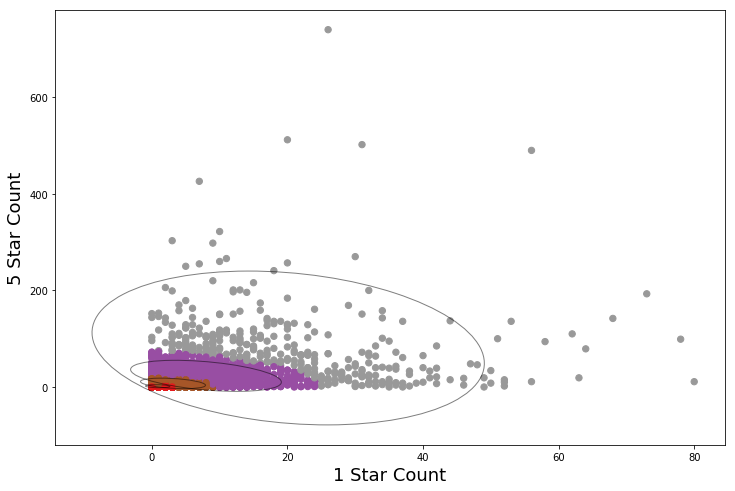

In [260]:
gmm = sm.GaussianMixture(n_components=4, random_state=12)
plot_gmm(gmm, X,"1 Star Count","5 Star Count",filename = 'star_clusters.eps')

